In [ ]:
import torch
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/descriptor-analysis-domain-generalization-master/parsed_pacs/ .
!cp -r /content/drive/MyDrive/descriptor-analysis-domain-generalization-master/domainbed/ .
!cp -r /content/drive/MyDrive/descriptor-analysis-domain-generalization-master/group_accuracy.py .





Mounted at /content/drive


In [ ]:
def extract_data(data, merge_groups=True, transform=None, ):
    zs, ys, preds, gs, logits = data['feature'], data['label'], data['pred'], data['group'], data['logits']
    if transform is not None:
        zs = transform(zs)
    #     gs = gs % 2
    return zs, ys, gs, preds, logits

In [ ]:
!python3 group_accuracy.py --data 'parsed_pacs/dann/dann_pacs_test_data.p'

Data file: parsed_pacs/dann/dann_pacs_test_data.p
Group 0: count=409, accuracy=0.15158924205378974
Group 1: count=468, accuracy=0.2799145299145299
Group 2: count=334, accuracy=0.11976047904191617
Group 3: count=785, accuracy=0.22929936305732485
Worst group: id=2, accuracy=0.11976047904191617
Average accuracy = 0.19514090351689017


In [ ]:
!python3 group_accuracy.py --data 'parsed_pacs/groupdro/groupdro_pacs_test_data.p'

Data file: parsed_pacs/groupdro/groupdro_pacs_test_data.p
Group 0: count=409, accuracy=0.8092909535452323
Group 1: count=468, accuracy=0.9572649572649573
Group 2: count=334, accuracy=0.9760479041916168
Group 3: count=785, accuracy=0.9656050955414013
Worst group: id=0, accuracy=0.8092909535452323
Average accuracy = 0.927052227635802


In [ ]:
%matplotlib notebook
!python3 confusion_matrix.py --data 'parsed_pacs/groupdro/groupdro_pacs_test_data.p' --groups '0'


(409,)
<Figure size 640x480 with 2 Axes>


In [ ]:
PATH_TO_FILE_TRAIN = "parsed_pacs/groupdro/groupdro_pacs_train_data.p"
PATH_TO_FILE_TEST = "parsed_pacs/erm/erm_pacs_test_data.p"

In [ ]:
import pickle
train_data = pickle.load(open(PATH_TO_FILE_TRAIN, 'rb'))
test_data = pickle.load(open(PATH_TO_FILE_TEST, 'rb'))

In [ ]:
train_gs = train_data['group']
n_train = len(train_gs)
groups, counts = np.unique(train_data['group'], return_counts=True, axis=0)
n_groups = len(groups)
n_classes = len(np.unique(train_data['label']))

In [ ]:
zs, ys, gs, preds, logits = extract_data(train_data)

test_zs, test_ys, test_gs, test_preds, test_logits = extract_data(test_data)

In [ ]:
#ys = original
#preds = pred
#logits = probs

In [ ]:
import pandas as pd
df_mixup = pd.DataFrame()

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
test_confs = tf.nn.softmax(test_logits)

In [ ]:
confs = []
for test_confs in test_confs:
  conf = np.max(test_confs)
  confs.append(conf)

In [ ]:
len(confs)

1996

In [ ]:
test_confs

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([1.0250935e-01, 8.9208966e-01, 9.8342204e-04, 5.5492407e-04,
       1.1685588e-03, 7.3975977e-04, 1.9543921e-03], dtype=float32)>

test_gs = test

In [ ]:
df_mixup['true_label'] = list(test_ys)
df_mixup['pred_label'] = list(test_preds)
df_mixup['confidence'] = confs
df_mixup['group'] = list(test_gs)


In [ ]:
df_mixup

,true_label,pred_label,confidence,group
0,1,1,0.999952,0
1,1,6,0.597749,0
2,0,0,1.000000,0
3,2,2,0.999977,0
4,4,1,0.795477,0
...,...,...,...,...
1991,1,1,1.000000,3
1992,4,4,1.000000,3
1993,1,1,0.999998,3
1994,1,1,0.999992,3


In [ ]:
# df_mixup_worst_group = df_mixup[df_mixup['group'] == 0]
df = df_mixup

In [ ]:
y_true = df.true_label.values
y_pred = df.pred_label.values
y_conf = df.confidence.values

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

In [ ]:
!git clone https://github.com/hollance/reliability-diagrams.git

Cloning into 'reliability-diagrams'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 67 (delta 16), reused 58 (delta 10), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [ ]:
import os, sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from reliability_diagrams import *

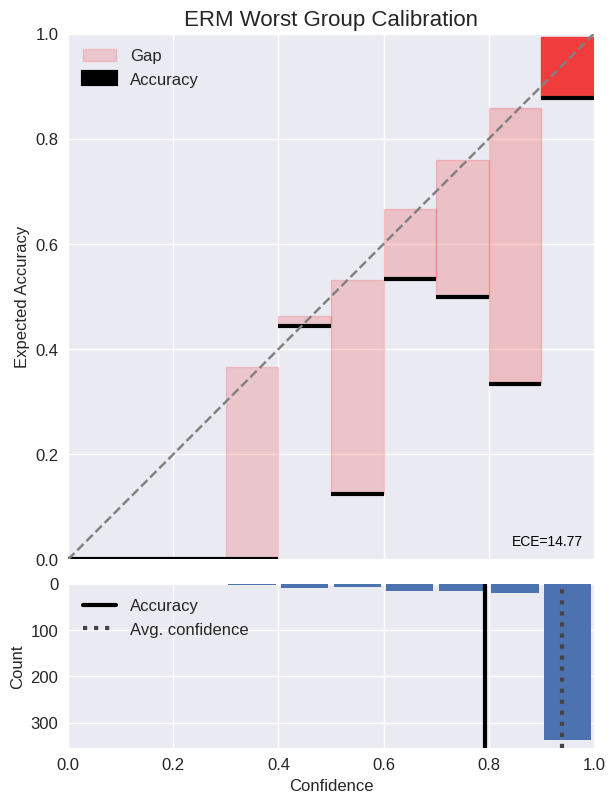

In [ ]:
title = "ERM Worst Group Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)


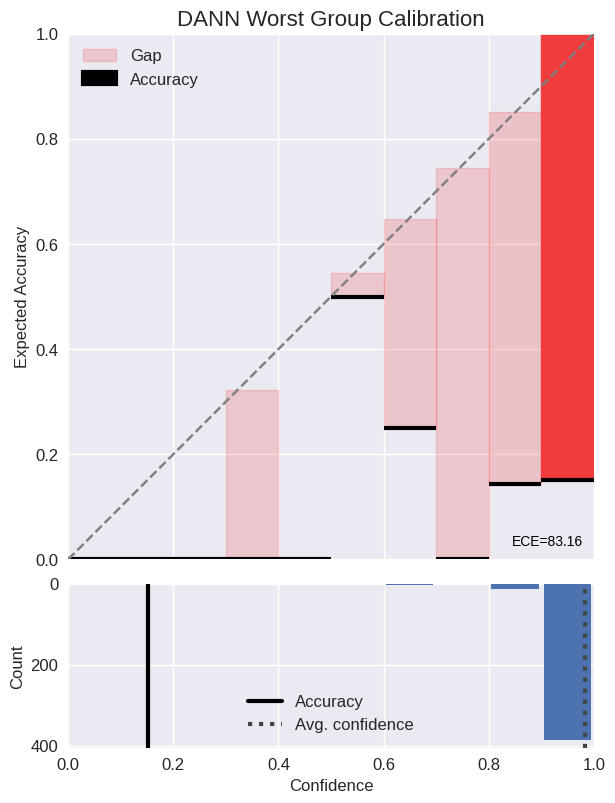

In [ ]:
title = "DANN Worst Group Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

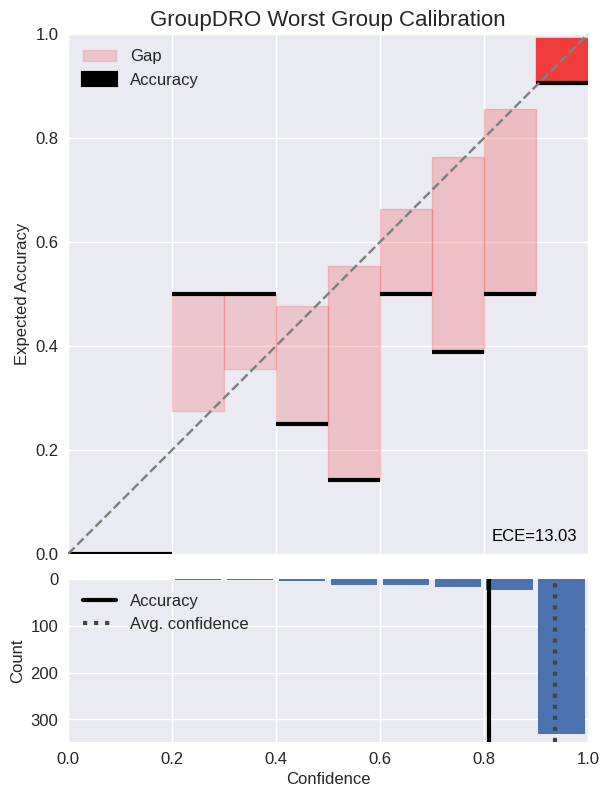

In [ ]:
title = "GroupDRO Worst Group Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)


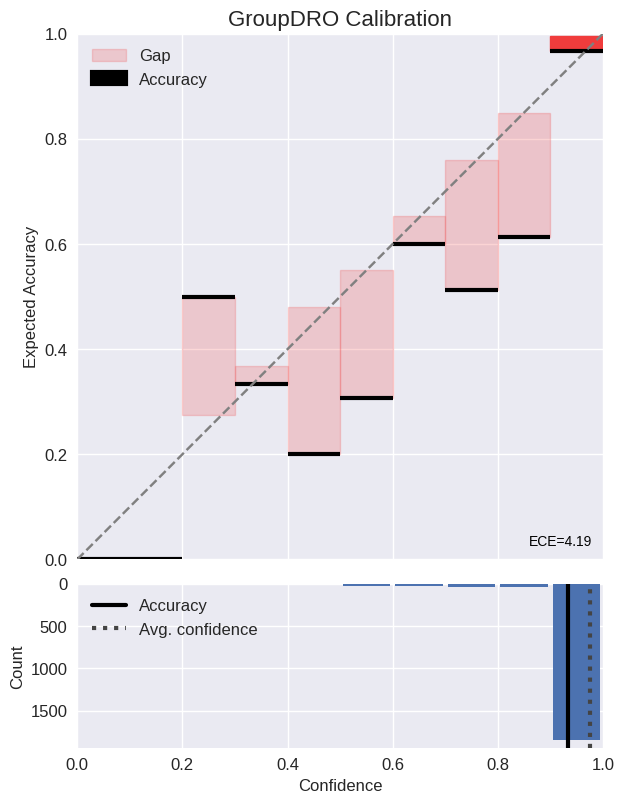

In [ ]:
title = "GroupDRO Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)


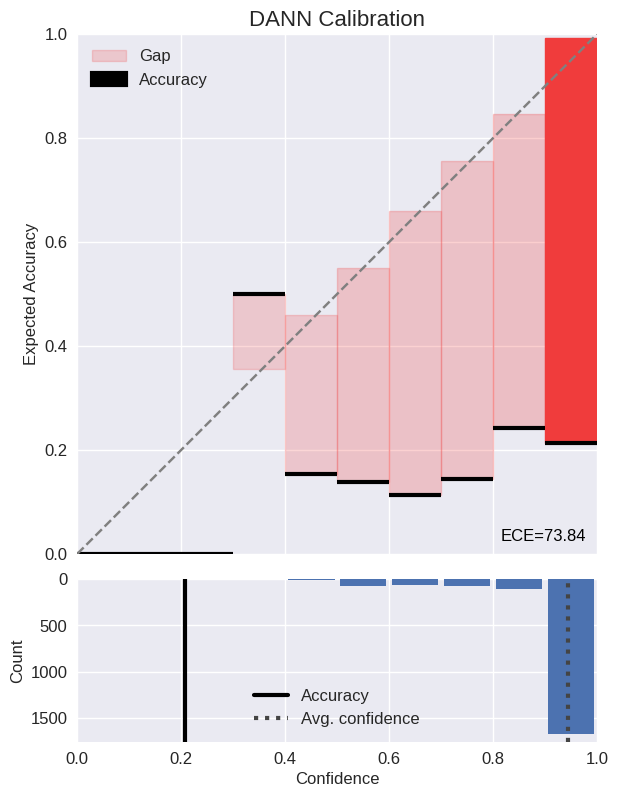

In [ ]:
title = "DANN Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)


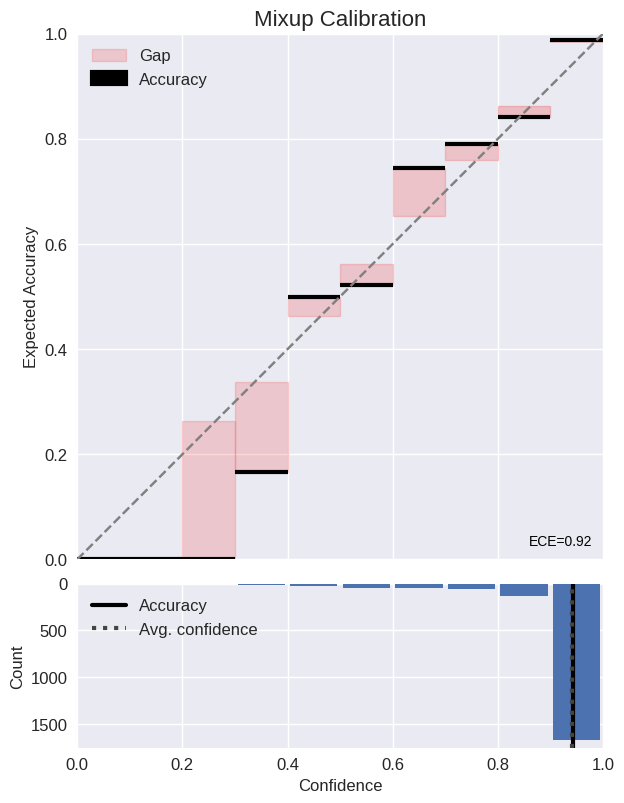

In [ ]:
title = "Mixup Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

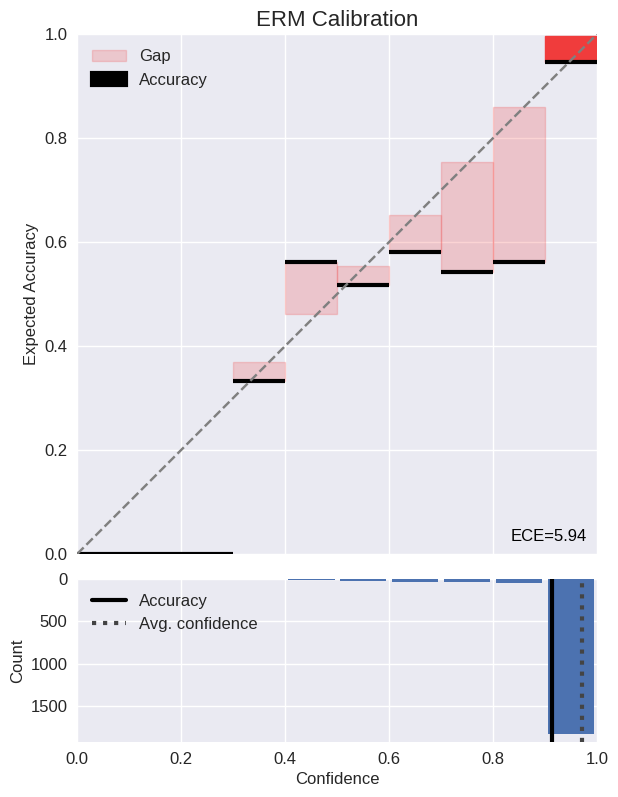

In [ ]:
title = "ERM Calibration"

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)